In [4]:
# Import required libraries
import sys
sys.path.append('../src')

from soc_opros_loader import SocOprosLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Load the data
loader = SocOprosLoader()
print(f"Loading data from sheet: {loader.sheet_id}")

# Load the raw data first
raw_data = loader.load_data()
print(f"Raw data loaded: {raw_data.shape}")

# Get the clean responses matrix
responses = loader.get_responses_matrix()
statements = loader.get_statements()
respondents = loader.get_respondents()

print(f"\nData loaded successfully!")
print(f"- Responses matrix shape: {responses.shape}")
print(f"- Total statements: {len(statements)}")
print(f"- Total respondents: {len(respondents)}")

INFO:soc_opros_loader:Loading data from: https://docs.google.com/spreadsheets/d/17oJL-hVMqOehHFugKHDJBmGtbWkp7e1y4ccJFnxwapk/export?format=csv&gid=992488085


Loading data from sheet: 17oJL-hVMqOehHFugKHDJBmGtbWkp7e1y4ccJFnxwapk


INFO:soc_opros_loader:Data loaded successfully with encoding: utf-8 - Shape: (265, 16)
INFO:soc_opros_loader:Column names: ['statements', 'Амелия', 'Итанио', 'Отец', 'Ваал', 'Пик', 'Стилшейд', 'ПИПИПИ', 'Айса', 'Кель', 'Иезекиль', 'Нелот', 'Иннеад', 'Джазар', 'Кая', 'Айша']
INFO:soc_opros_loader:Column names: ['statements', 'Амелия', 'Итанио', 'Отец', 'Ваал', 'Пик', 'Стилшейд', 'ПИПИПИ', 'Айса', 'Кель', 'Иезекиль', 'Нелот', 'Иннеад', 'Джазар', 'Кая', 'Айша']
INFO:soc_opros_loader:Structure parsed - 265 statements, 15 respondents
INFO:soc_opros_loader:Structure parsed - 265 statements, 15 respondents
INFO:soc_opros_loader:Filling 402 missing values with neutral response (3.0)
INFO:soc_opros_loader:Responses matrix created - Shape: (265, 15)
INFO:soc_opros_loader:Filling 402 missing values with neutral response (3.0)
INFO:soc_opros_loader:Responses matrix created - Shape: (265, 15)


Raw data loaded: (265, 16)

Data loaded successfully!
- Responses matrix shape: (265, 15)
- Total statements: 265
- Total respondents: 15


In [8]:
# Quick data overview
print("Sample of responses matrix:")
print(responses.iloc[:5, :5])

print("\nFirst 5 statements:")
for i, stmt in enumerate(statements[:5], 1):
    print(f"{i:2d}. {stmt}")

print("\nFirst 5 respondents:")
for i, name in enumerate(respondents[:5], 1):
    print(f"{i:2d}. {name}")

Sample of responses matrix:
                                                    Амелия  Итанио  Отец  \
Life should have an end                                5.0     4.0   5.0   
You should do whatever you want regardless of c...     1.0     2.0   3.0   
It is good to be alive                                 5.0     4.0   3.0   
Existing is good                                       4.0     2.0   3.0   
You consider yourself happy                            4.0     2.0   4.0   

                                                    Ваал  Пик  
Life should have an end                              1.0  3.0  
You should do whatever you want regardless of c...   4.0  2.0  
It is good to be alive                               4.0  5.0  
Existing is good                                     5.0  5.0  
You consider yourself happy                          2.0  3.0  

First 5 statements:
 1. Life should have an end
 2. You should do whatever you want regardless of consequences
 3. It is good to b

---

## Research Area

Use the cells below for your research and experimentation. The following variables are available:

- `responses`: DataFrame with response data (statements × respondents)
- `statements`: List of survey statements
- `respondents`: List of respondent names
- `loader`: SocOprosLoader instance for additional data operations

In [7]:
# Your research code here

## Statement Correlation Analysis

This analysis examines how responses to different statements correlate with each other. When a character scores high on Statement A, do they tend to score high (or low, or unrelated) on Statement B?

### Key Insights:
- **Positive correlation (close to +1)**: When someone agrees with one statement, they tend to agree with the other
- **Negative correlation (close to -1)**: When someone agrees with one statement, they tend to disagree with the other  
- **No correlation (close to 0)**: The statements are unrelated in how people respond

In [9]:
# Compute correlation matrix between statements
# Each row is a statement, each column is a respondent
# We want to see how statements correlate with each other across respondents

statement_correlations = responses.T.corr()
print(f"Correlation matrix shape: {statement_correlations.shape}")
print(f"Range of correlations: {statement_correlations.values.min():.3f} to {statement_correlations.values.max():.3f}")

# Quick statistics
correlation_values = statement_correlations.values
# Remove diagonal (self-correlations = 1.0)
mask = ~np.eye(correlation_values.shape[0], dtype=bool)
off_diagonal_corr = correlation_values[mask]

print(f"\nCorrelation Statistics (excluding self-correlations):")
print(f"Mean correlation: {off_diagonal_corr.mean():.3f}")
print(f"Std deviation: {off_diagonal_corr.std():.3f}")
print(f"Min correlation: {off_diagonal_corr.min():.3f}")
print(f"Max correlation: {off_diagonal_corr.max():.3f}")

Correlation matrix shape: (265, 265)
Range of correlations: -1.000 to 1.000

Correlation Statistics (excluding self-correlations):
Mean correlation: 0.016
Std deviation: 0.312
Min correlation: -1.000
Max correlation: 0.952


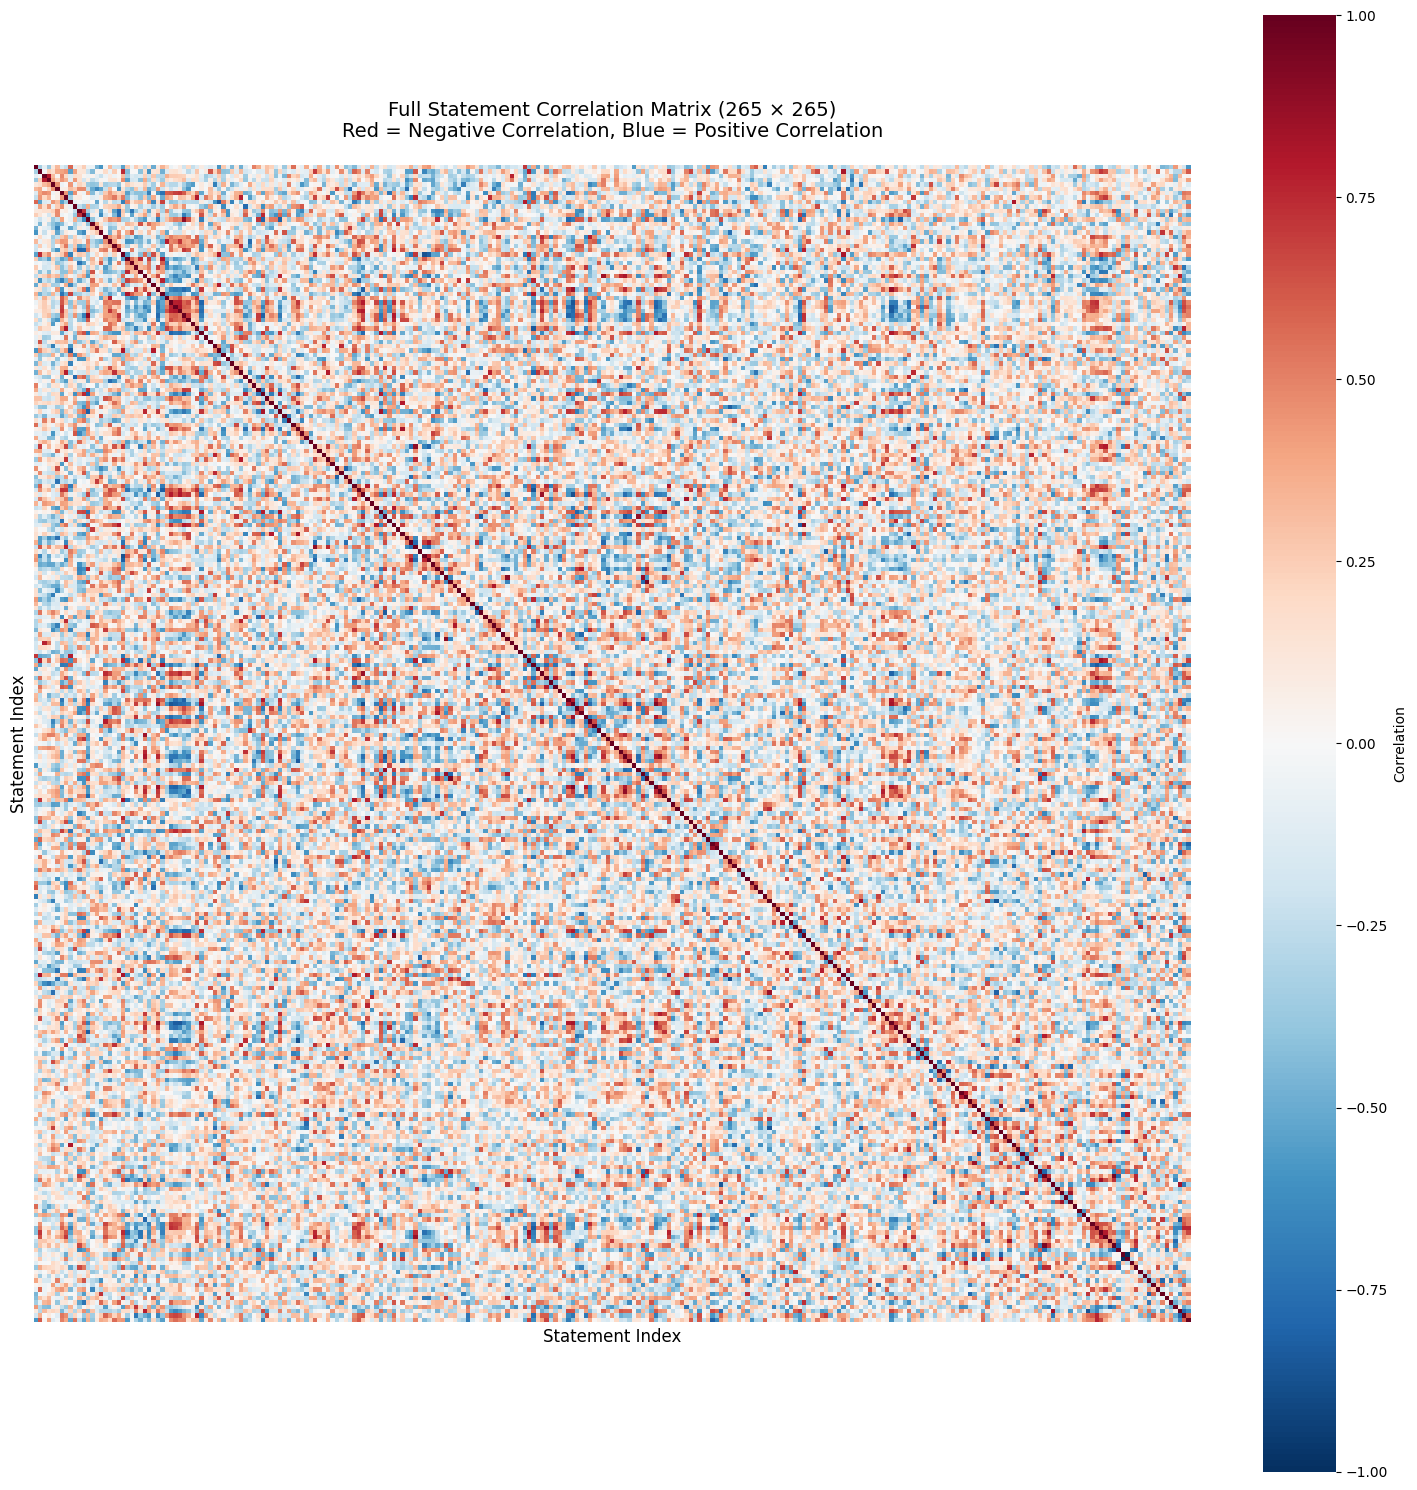

In [13]:
# Plot the full correlation matrix without statement labels
plt.figure(figsize=(15, 15))

# Create the heatmap for the full matrix
sns.heatmap(statement_correlations, 
            xticklabels=False,  # No x-axis labels
            yticklabels=False,  # No y-axis labels
            cmap='RdBu_r', 
            center=0,
            annot=False,
            square=True,
            cbar_kws={'label': 'Correlation'})

plt.title(f'Full Statement Correlation Matrix ({len(statements)} × {len(statements)})\n'
          'Red = Negative Correlation, Blue = Positive Correlation', 
          fontsize=14, pad=20)
plt.xlabel('Statement Index', fontsize=12)
plt.ylabel('Statement Index', fontsize=12)
plt.tight_layout()
plt.show()

---

## Absolute Correlation Analysis

This section focuses on **absolute correlation strength** regardless of direction. This is particularly useful for identifying:
- **Duplicate questions with negation** (e.g., "I am happy" vs "I am not happy")
- **Conceptually identical statements** phrased differently
- **Strong relationships** regardless of positive/negative correlation

### Formula: `absolute_correlation = abs(correlation) * 2 - 1`

This transforms correlations so that:
- Strong positive correlation (+0.8) → 0.6
- Strong negative correlation (-0.8) → 0.6  
- No correlation (0.0) → -1.0

Higher values indicate stronger relationships regardless of direction.

In [25]:
# Create absolute correlation matrix
# Formula: abs(correlation) * 2 - 1
# This emphasizes strength regardless of direction

absolute_correlations = statement_correlations.abs() * 2 - 1

print(f"Absolute Correlation Matrix created: {absolute_correlations.shape}")
print(f"Value range: {absolute_correlations.values.min():.3f} to {absolute_correlations.values.max():.3f}")

# Quick statistics (excluding diagonal)
abs_corr_values = absolute_correlations.values
mask = ~np.eye(abs_corr_values.shape[0], dtype=bool)
off_diagonal_abs = abs_corr_values[mask]

print(f"\nAbsolute Correlation Statistics (excluding self-correlations):")
print(f"Mean: {off_diagonal_abs.mean():.3f}")
print(f"Std deviation: {off_diagonal_abs.std():.3f}")
print(f"Min: {off_diagonal_abs.min():.3f}")
print(f"Max: {off_diagonal_abs.max():.3f}")

# Compare with original correlation stats
print(f"\n📊 Comparison with original correlations:")
print(f"Original mean: {off_diagonal_corr.mean():.3f} → Absolute mean: {off_diagonal_abs.mean():.3f}")
print(f"Original max: {off_diagonal_corr.max():.3f} → Absolute max: {off_diagonal_abs.max():.3f}")
print(f"Original min: {off_diagonal_corr.min():.3f} → Absolute min: {off_diagonal_abs.min():.3f}")

Absolute Correlation Matrix created: (265, 265)
Value range: -1.000 to 1.000

Absolute Correlation Statistics (excluding self-correlations):
Mean: -0.489
Std deviation: 0.361
Min: -1.000
Max: 1.000

📊 Comparison with original correlations:
Original mean: 0.016 → Absolute mean: -0.489
Original max: 0.952 → Absolute max: 1.000
Original min: -1.000 → Absolute min: -1.000


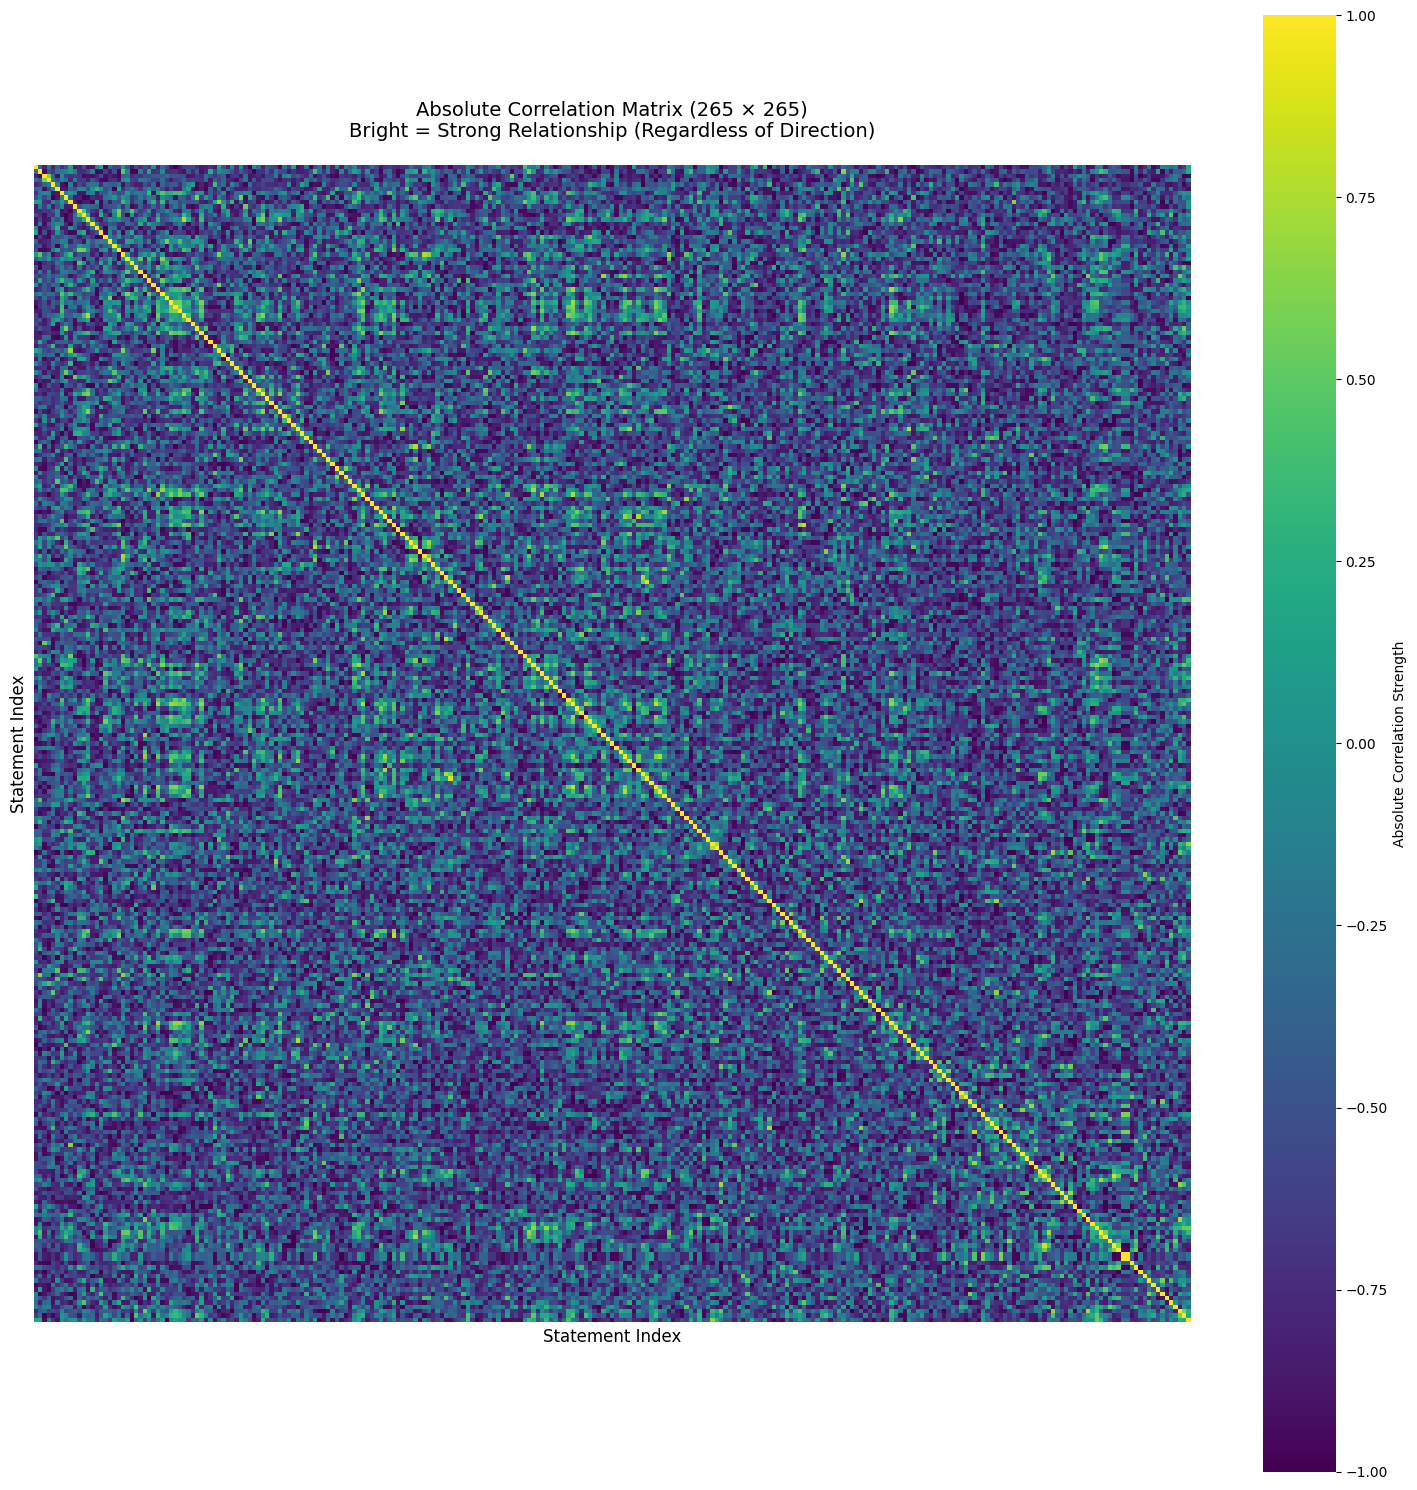

In [27]:
# Plot the absolute correlation matrix in same style as original
plt.figure(figsize=(15, 15))

# Create the heatmap for the absolute correlation matrix
sns.heatmap(absolute_correlations, 
            xticklabels=False,  # No x-axis labels
            yticklabels=False,  # No y-axis labels
            cmap='viridis', 
            annot=False,
            square=True,
            cbar_kws={'label': 'Absolute Correlation Strength'})

plt.title(f'Absolute Correlation Matrix ({len(statements)} × {len(statements)})\n'
          'Bright = Strong Relationship (Regardless of Direction)', 
          fontsize=14, pad=20)
plt.xlabel('Statement Index', fontsize=12)
plt.ylabel('Statement Index', fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
# Create a simple force-directed layout using absolute correlations
print("Creating force-directed graph based on absolute correlation strength...")

Creating force-directed graph based on absolute correlation strength...


In [29]:
# Create force-directed graph where correlation strength determines node positions
# We'll use a simplified spring model approach

def spring_layout_2d_absolute(correlation_matrix, iterations=50, k=1.0, threshold=0.0):
    """
    Spring layout algorithm using absolute correlations as attractive forces
    All strong relationships (positive or negative) = attractive force
    Weak relationships = no force
    """
    n = len(correlation_matrix)
    
    # Initialize random positions
    np.random.seed(42)  # For reproducible results
    pos = np.random.randn(n, 2) * 0.1
    
    # Spring forces simulation
    for iteration in range(iterations):
        forces = np.zeros_like(pos)
        
        for i in range(n):
            for j in range(i + 1, n):
                abs_corr = correlation_matrix.iloc[i, j]  # Already absolute correlation
                
                # Only apply forces for significant absolute correlations
                if abs_corr > threshold:
                    # Vector from j to i
                    diff = pos[i] - pos[j]
                    distance = np.linalg.norm(diff)
                    
                    if distance > 0:
                        # Normalize direction
                        direction = diff / distance
                        
                        # Force magnitude based on absolute correlation
                        # Strong relationships = attractive (pull together)
                        # Scale by absolute correlation strength
                        force_magnitude = abs_corr * k / (distance + 0.1)
                        
                        force = direction * force_magnitude
                        forces[i] -= force  # Apply attractive force to i
                        forces[j] += force  # Equal and opposite force to j
        
        # Update positions with damping
        pos += forces * 0.01
    
    return pos

print("Absolute correlation force-directed layout function created!")

Absolute correlation force-directed layout function created!


Computing force-directed layout based on absolute correlations...
Layout computed for 265 statements
Layout computed for 265 statements


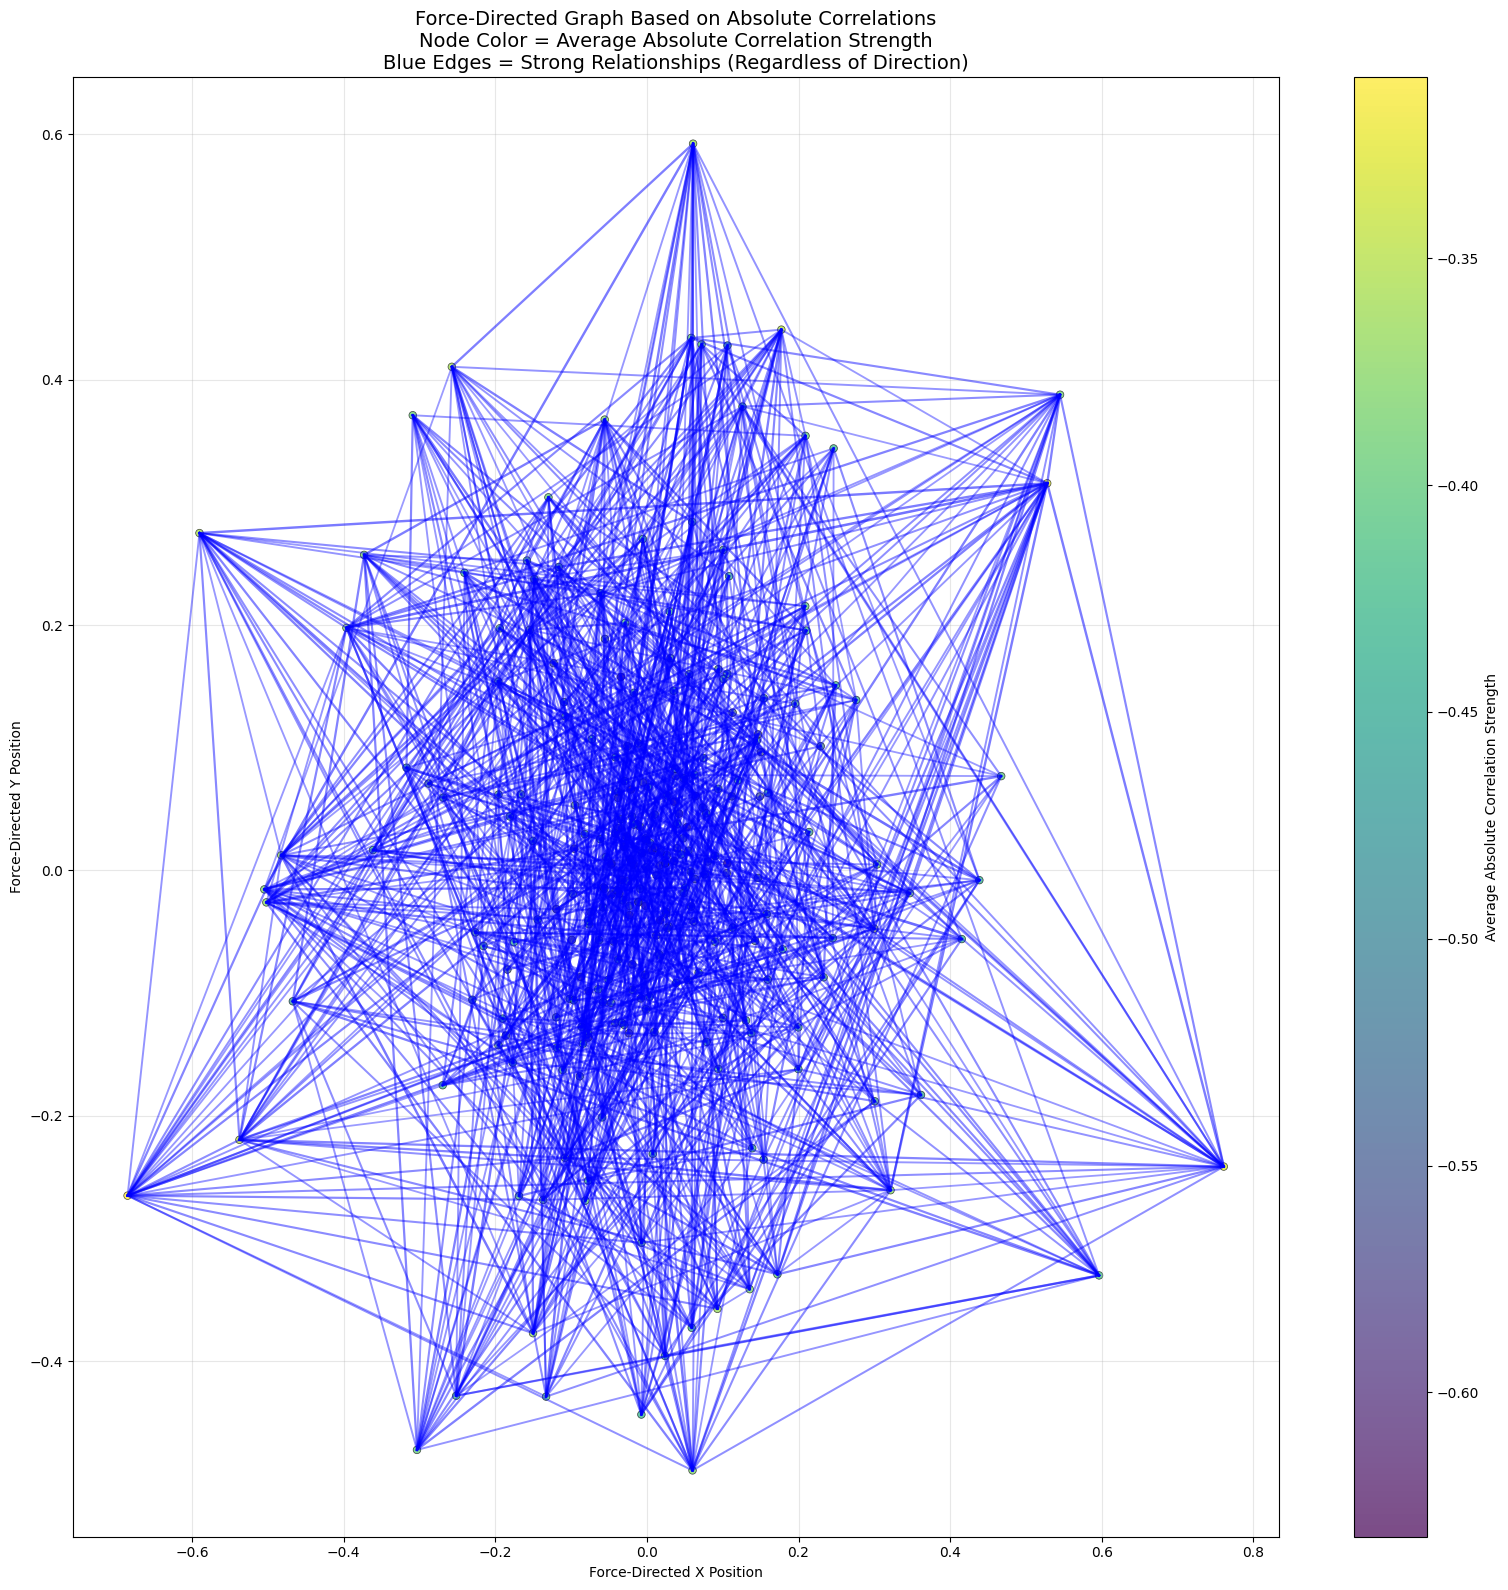

Graph shows 265 statement nodes
Edges drawn for absolute correlations > 0.3
Nodes cluster together based on relationship STRENGTH, regardless of positive/negative direction


In [39]:
# Compute positions using absolute correlation force-directed layout
print("Computing force-directed layout based on absolute correlations...")
positions = spring_layout_2d_absolute(absolute_correlations, iterations=100, k=2.0, threshold=0.2)

print(f"Layout computed for {len(positions)} statements")

# Create the force-directed graph visualization
plt.figure(figsize=(16, 16))

# Plot nodes (statements)
x_coords = positions[:, 0]
y_coords = positions[:, 1]

# Color nodes by their average absolute correlation with other nodes
avg_abs_correlations = []
for i in range(len(absolute_correlations)):
    # Calculate average absolute correlation (excluding self)
    row_corr = absolute_correlations.iloc[i, :]
    avg_corr = row_corr[row_corr.index != i].mean()
    avg_abs_correlations.append(avg_corr)

# Create scatter plot
scatter = plt.scatter(x_coords, y_coords, 
                     c=avg_abs_correlations, 
                     cmap='viridis', 
                     s=30, 
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=0.5)

# Draw edges for strong absolute correlations
edge_threshold = 0.3  # Lower threshold since we're using absolute correlations
for i in range(len(absolute_correlations)):
    for j in range(i + 1, len(absolute_correlations)):
        abs_corr = absolute_correlations.iloc[i, j]
        if abs_corr > edge_threshold:
            # Draw edge
            x1, y1 = positions[i]
            x2, y2 = positions[j]
            
            # All edges are blue since we're showing absolute strength
            color = 'blue'
            alpha = min(abs_corr + 1.0, 2.0) / 2.0 * 0.6  # Normalize and set transparency
            
            plt.plot([x1, x2], [y1, y2], color=color, alpha=alpha, linewidth=(abs_corr + 1.0))

plt.colorbar(scatter, label='Average Absolute Correlation Strength')
plt.title('Force-Directed Graph Based on Absolute Correlations\n'
          'Node Color = Average Absolute Correlation Strength\n'
          'Blue Edges = Strong Relationships (Regardless of Direction)',
          fontsize=14)
plt.xlabel('Force-Directed X Position')
plt.ylabel('Force-Directed Y Position')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Graph shows {len(positions)} statement nodes")
print(f"Edges drawn for absolute correlations > {edge_threshold}")
print("Nodes cluster together based on relationship STRENGTH, regardless of positive/negative direction")

## Absolute Correlation Force-Directed Graph Results

🎯 **What this visualization shows:**

### **Node Positioning**
- **Clusters**: Statements with strong relationships (positive OR negative) are pulled together
- **Isolated nodes**: Statements with weak relationships to all others
- **Distance**: Physical distance represents relationship weakness (regardless of direction)

### **Edge Colors & Thickness**
- **🔵 Blue edges**: Strong relationships (absolute correlation strength)
- **Edge thickness**: Absolute correlation strength (thicker = stronger relationship)
- **No red edges**: Direction doesn't matter - only relationship strength

### **Node Colors (Yellow → Purple)**
- **Bright yellow**: High average absolute correlation with other statements
- **Purple**: Lower average absolute correlation (more unique response patterns)

### **Key Insights**
This absolute correlation approach reveals **conceptual clusters** where statements group together based on relationship STRENGTH regardless of whether the relationship is positive or negative. This is particularly useful for:
- **Identifying duplicate questions** phrased differently (positively vs negatively)
- **Finding conceptually related statements** regardless of agreement/disagreement patterns
- **Discovering survey structure** based on pure relationship strength

In [31]:
def explore_force_parameters_absolute(correlation_matrix, param_configs):
    """
    Explore different force parameters for absolute correlations
    
    param_configs: list of dicts with keys: iterations, k, threshold, name
    """
    results = {}
    
    for config in param_configs:
        print(f"Computing layout: {config['name']}")
        
        # Compute positions with these parameters using absolute correlation function
        positions = spring_layout_2d_absolute(
            correlation_matrix, 
            iterations=config['iterations'], 
            k=config['k'], 
            threshold=config['threshold']
        )
        
        # Calculate layout quality metrics
        # 1. Average distance between nodes
        avg_distance = np.mean([np.linalg.norm(positions[i] - positions[j]) 
                               for i in range(len(positions)) 
                               for j in range(i+1, len(positions))])
        
        # 2. Clustering metric (variance of positions)
        variance_x = np.var(positions[:, 0])
        variance_y = np.var(positions[:, 1])
        spread = variance_x + variance_y
        
        # 3. Count edges that would be drawn (using absolute correlation values)
        edge_count = 0
        for i in range(len(correlation_matrix)):
            for j in range(i + 1, len(correlation_matrix)):
                if correlation_matrix.iloc[i, j] > config['threshold']:
                    edge_count += 1
        
        results[config['name']] = {
            'positions': positions,
            'config': config,
            'avg_distance': avg_distance,
            'spread': spread,
            'edge_count': edge_count
        }
    
    return results

# Define parameter configurations optimized for absolute correlations
param_configs = [
    {'iterations': 50, 'k': 1.0, 'threshold': 0.0, 'name': 'Low Force, All Edges'},
    {'iterations': 50, 'k': 2.0, 'threshold': 0.2, 'name': 'Medium Force, Medium Edges'},
    {'iterations': 100, 'k': 3.0, 'threshold': 0.4, 'name': 'High Force, Strong Edges'},
    {'iterations': 150, 'k': 1.5, 'threshold': 0.1, 'name': 'Long Simulation, Balanced'},
    {'iterations': 50, 'k': 0.5, 'threshold': 0.5, 'name': 'Weak Force, Very Strong Only'},
    {'iterations': 200, 'k': 4.0, 'threshold': 0.0, 'name': 'Very Long, Strong Force'}
]

print("Starting absolute correlation parameter exploration...")
force_results = explore_force_parameters_absolute(absolute_correlations, param_configs)
print(f"Completed {len(force_results)} configurations")

Starting absolute correlation parameter exploration...
Computing layout: Low Force, All Edges
Computing layout: Medium Force, Medium Edges
Computing layout: Medium Force, Medium Edges
Computing layout: High Force, Strong Edges
Computing layout: High Force, Strong Edges
Computing layout: Long Simulation, Balanced
Computing layout: Long Simulation, Balanced
Computing layout: Weak Force, Very Strong Only
Computing layout: Weak Force, Very Strong Only
Computing layout: Very Long, Strong Force
Computing layout: Very Long, Strong Force
Completed 6 configurations
Completed 6 configurations


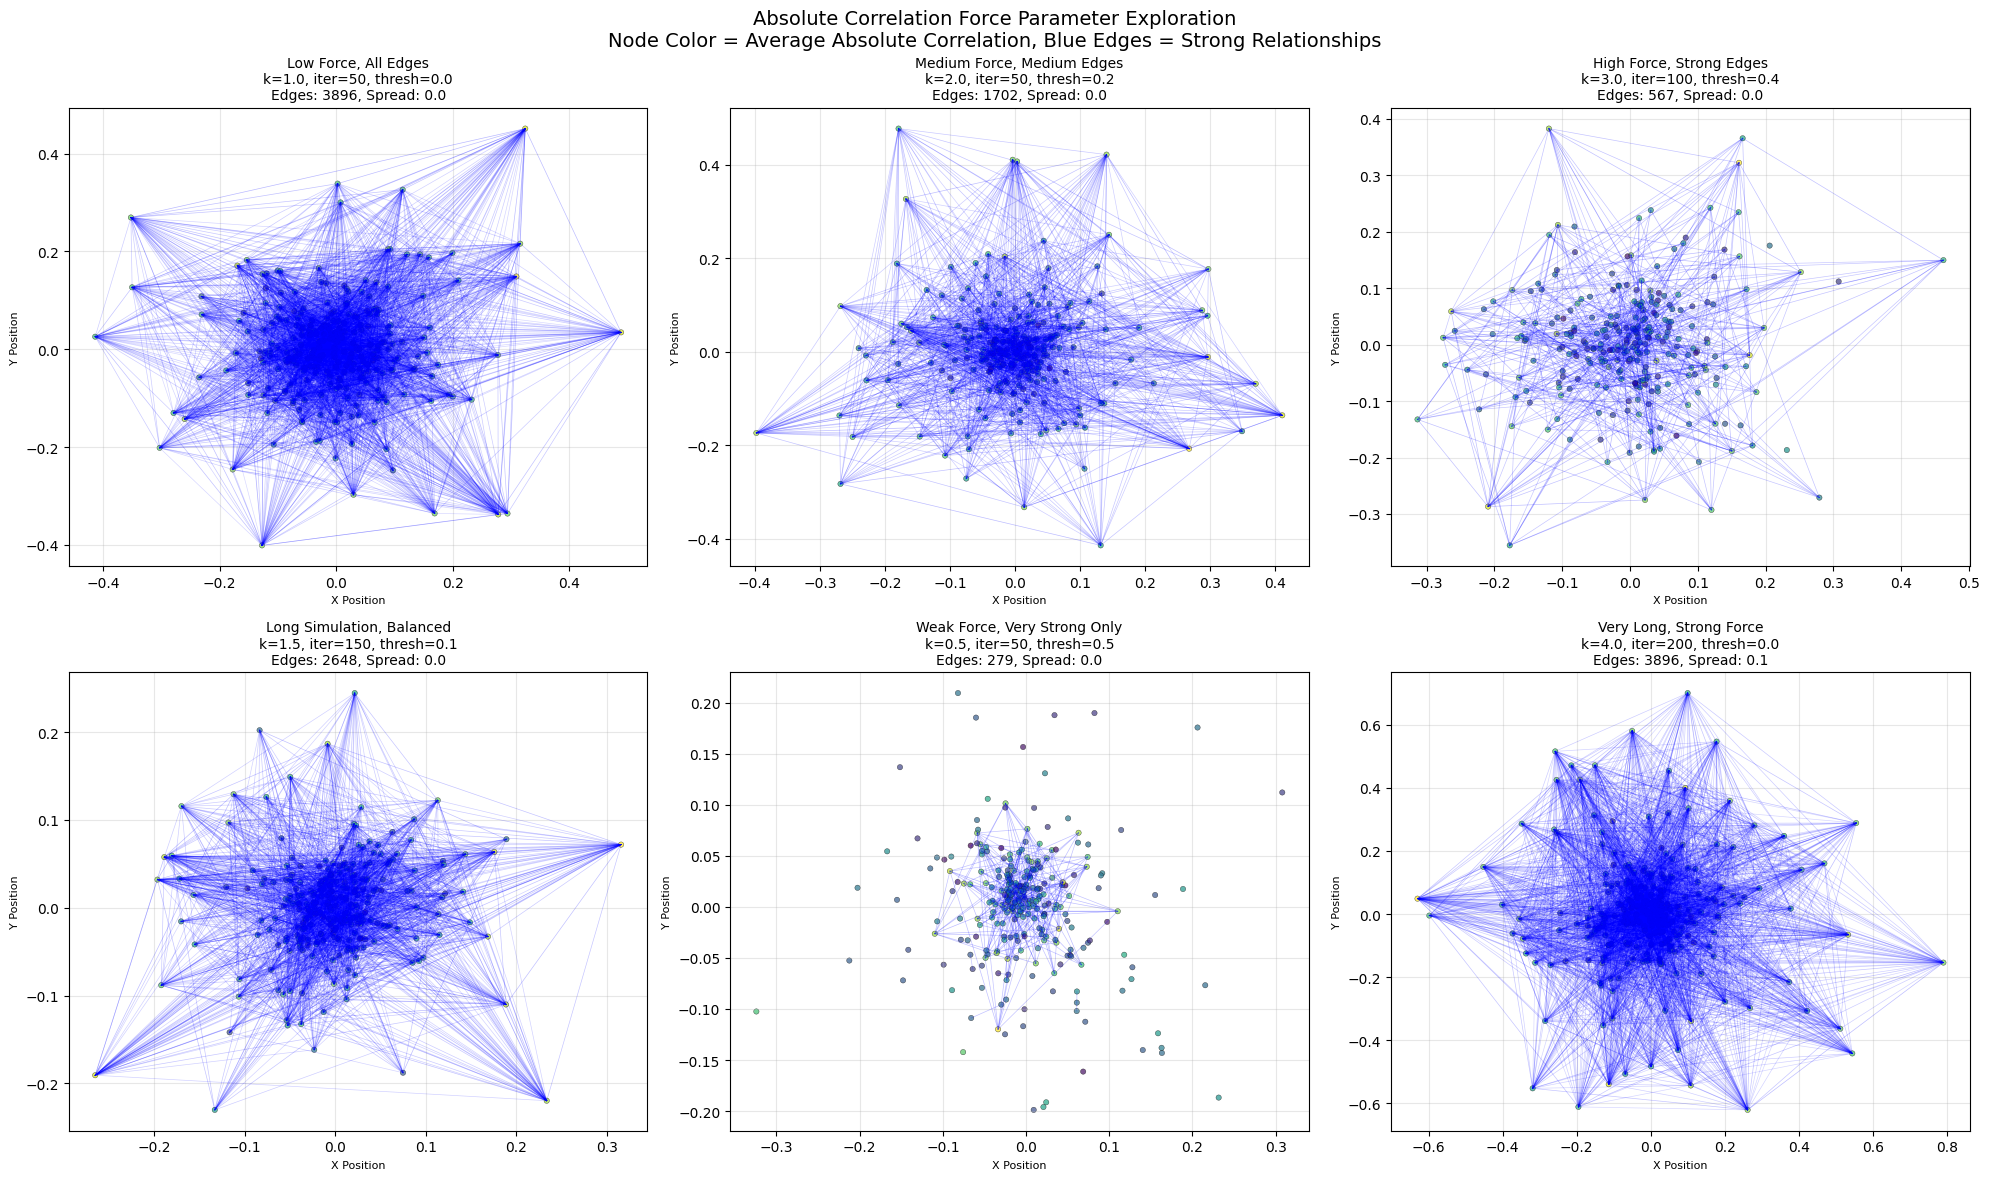

In [32]:
# Create comparison visualization of all parameter configurations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (name, result) in enumerate(force_results.items()):
    ax = axes[idx]
    positions = result['positions']
    config = result['config']
    
    # Calculate average absolute correlations for coloring
    avg_abs_correlations = []
    for i in range(len(absolute_correlations)):
        row_corr = absolute_correlations.iloc[i, :]
        avg_corr = row_corr[row_corr.index != i].mean()
        avg_abs_correlations.append(avg_corr)
    
    # Plot nodes
    x_coords = positions[:, 0]
    y_coords = positions[:, 1]
    
    scatter = ax.scatter(x_coords, y_coords, 
                        c=avg_abs_correlations, 
                        cmap='viridis', 
                        s=15,  # Smaller nodes for overview
                        alpha=0.7,
                        edgecolors='black',
                        linewidth=0.3)
    
    # Draw edges for strong absolute correlations
    edge_count = 0
    for i in range(len(absolute_correlations)):
        for j in range(i + 1, len(absolute_correlations)):
            abs_corr = absolute_correlations.iloc[i, j]
            if abs_corr > config['threshold']:
                edge_count += 1
                x1, y1 = positions[i]
                x2, y2 = positions[j]
                color = 'blue'  # All edges blue since showing absolute strength
                alpha_val = min((abs_corr + 1.0) / 2.0, 1.0) * 0.3  # Normalize transparency
                ax.plot([x1, x2], [y1, y2], color=color, alpha=alpha_val, linewidth=0.5)
    
    # Formatting
    ax.set_title(f'{name}\n'
                f'k={config["k"]}, iter={config["iterations"]}, thresh={config["threshold"]}\n'
                f'Edges: {edge_count}, Spread: {result["spread"]:.1f}', 
                fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X Position', fontsize=8)
    ax.set_ylabel('Y Position', fontsize=8)

plt.suptitle('Absolute Correlation Force Parameter Exploration\n'
            'Node Color = Average Absolute Correlation, Blue Edges = Strong Relationships', 
            fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
# Analyze and compare the absolute correlation results
print("🔍 ABSOLUTE CORRELATION FORCE PARAMETER ANALYSIS")
print("="*60)

# Create comparison table
comparison_data = []
for name, result in force_results.items():
    config = result['config']
    comparison_data.append({
        'Configuration': name,
        'k (Force)': config['k'],
        'Iterations': config['iterations'], 
        'Threshold': config['threshold'],
        'Edge Count': result['edge_count'],
        'Avg Distance': f"{result['avg_distance']:.2f}",
        'Spread': f"{result['spread']:.1f}"
    })

comparison_df = pd.DataFrame(comparison_data)
print("\n📊 PARAMETER COMPARISON TABLE:")
print(comparison_df.to_string(index=False))

print(f"\n🎯 KEY INSIGHTS:")
print(f"📈 Most edges: {max(force_results.items(), key=lambda x: x[1]['edge_count'])[0]}")
print(f"📉 Fewest edges: {min(force_results.items(), key=lambda x: x[1]['edge_count'])[0]}")
print(f"🎯 Highest spread: {max(force_results.items(), key=lambda x: x[1]['spread'])[0]}")
print(f"🎯 Lowest spread: {min(force_results.items(), key=lambda x: x[1]['spread'])[0]}")

print(f"\n💡 INTERPRETATION FOR ABSOLUTE CORRELATIONS:")
print(f"• Higher 'k' values = Stronger forces → More dramatic clustering by relationship strength")
print(f"• Higher 'threshold' = Fewer edges → Only very strong relationships shown")
print(f"• More iterations = More stable final positions")
print(f"• 'Spread' indicates clustering tightness")
print(f"• All relationships are attractive (no repulsion) since we use absolute values")
print(f"• This reveals conceptual similarity regardless of agreement/disagreement direction")

🔍 ABSOLUTE CORRELATION FORCE PARAMETER ANALYSIS

📊 PARAMETER COMPARISON TABLE:
               Configuration  k (Force)  Iterations  Threshold  Edge Count Avg Distance Spread
        Low Force, All Edges        1.0          50        0.0        3896         0.18    0.0
  Medium Force, Medium Edges        2.0          50        0.2        1702         0.17    0.0
    High Force, Strong Edges        3.0         100        0.4         567         0.18    0.0
   Long Simulation, Balanced        1.5         150        0.1        2648         0.11    0.0
Weak Force, Very Strong Only        0.5          50        0.5         279         0.11    0.0
     Very Long, Strong Force        4.0         200        0.0        3896         0.29    0.1

🎯 KEY INSIGHTS:
📈 Most edges: Low Force, All Edges
📉 Fewest edges: Weak Force, Very Strong Only
🎯 Highest spread: Very Long, Strong Force
🎯 Lowest spread: Long Simulation, Balanced

💡 INTERPRETATION FOR ABSOLUTE CORRELATIONS:
• Higher 'k' values = Stronge